Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




Load Data

In [30]:
file = '../Data/EURUSD.xlsx'
df = pd.read_excel(file)

data = df.head(1000)

Input: Indeks waktu, Output: harga close

In [31]:
X = np.arange(len(data)).reshape(-1, 1)
y = data["Close"].values

Fungsi Evaluasi

In [32]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    return y_pred, mae, rmse, mape, r2

Eksperimen dengan 2 splits
1. 70% data latih dan 30% data uji
2. 80% data latih dan 20% data uji

In [33]:
splits = {
    "70-30": train_test_split(X, y, test_size=0.3, random_state=1),
    "80-20": train_test_split(X, y, test_size=0.2, random_state=1)
}

Model SVR RBF

In [34]:
svr_rbf = make_pipeline(StandardScaler(),
                        SVR(kernel="rbf", C=1.0, gamma=0.01, epsilon=0.2))

svr_rbf2 = make_pipeline(StandardScaler(),
                        SVR(kernel="rbf", C=100, gamma=0.01, epsilon=0.01))

In [35]:
results = {}

for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    y_pred, mae, rmse, mape, r2 = evaluate_model(svr_rbf, X_train, X_test, y_train, y_test)
    results[split_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }

# Cetak beberapa hasil prediksi
print(f"\n=== Hasil Prediksi untuk Split {split_name} ===")
for i in range(10):  # tampilkan 10 data pertama
    print(f"Asli: {y_test[i]:.4f} | Prediksi: {y_pred[i]:.4f}")


=== Hasil Prediksi untuk Split 80-20 ===
Asli: 1.1108 | Prediksi: 1.0700
Asli: 1.0399 | Prediksi: 1.0700
Asli: 1.0595 | Prediksi: 1.0700
Asli: 1.1228 | Prediksi: 1.0700
Asli: 1.0651 | Prediksi: 1.0700
Asli: 1.1321 | Prediksi: 1.0700
Asli: 1.0614 | Prediksi: 1.0700
Asli: 1.0517 | Prediksi: 1.0700
Asli: 1.0822 | Prediksi: 1.0700
Asli: 1.0046 | Prediksi: 1.0700


In [36]:
results2 = {}

for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    y_pred, mae, rmse, mape, r2 = evaluate_model(svr_rbf2, X_train, X_test, y_train, y_test)
    results2[split_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }

# Cetak beberapa hasil prediksi
print(f"\n=== Hasil Prediksi untuk Split {split_name} ===")
for i in range(10):  # tampilkan 10 data pertama biar tidak terlalu panjang
    print(f"Asli: {y_test[i]:.4f} | Prediksi: {y_pred[i]:.4f}")


=== Hasil Prediksi untuk Split 80-20 ===
Asli: 1.1108 | Prediksi: 1.0822
Asli: 1.0399 | Prediksi: 1.0942
Asli: 1.0595 | Prediksi: 1.0819
Asli: 1.1228 | Prediksi: 1.0797
Asli: 1.0651 | Prediksi: 1.0693
Asli: 1.1321 | Prediksi: 1.1137
Asli: 1.0614 | Prediksi: 1.0717
Asli: 1.0517 | Prediksi: 1.0933
Asli: 1.0822 | Prediksi: 1.0768
Asli: 1.0046 | Prediksi: 1.0257


Cetak hasil ke DataFrame

In [37]:
df_results = pd.DataFrame(results).T
print("Hasil evaluasi SVR RBF:\n", df_results)
start_time = time.time()
svr_rbf.fit(X_train, y_train)   # proses training RBF
end_time = time.time()
waktu_pelatihan_poly = end_time - start_time
print(f"Waktu pelatihan Polynomial: {waktu_pelatihan_poly:.4f} detik")

df_results2 = pd.DataFrame(results2).T
print("\nHasil evaluasi SVR RBF2:\n", df_results2)
start_time = time.time()
svr_rbf2.fit(X_train, y_train)   # proses training RBF
end_time = time.time()
waktu_pelatihan_poly = end_time - start_time
print(f"Waktu pelatihan Polynomial: {waktu_pelatihan_poly:.4f} detik")

Hasil evaluasi SVR RBF:
             MAE      RMSE      MAPE        R2
70-30  0.029794  0.039515  2.781592 -0.007493
80-20  0.029350  0.039243  2.744540 -0.003940
Waktu pelatihan Polynomial: 0.0013 detik

Hasil evaluasi SVR RBF2:
             MAE      RMSE      MAPE        R2
70-30  0.022264  0.029552  2.101044  0.436510
80-20  0.021726  0.029260  2.056382  0.441843
Waktu pelatihan Polynomial: 0.0518 detik


Menampilkan grafik perbandingan

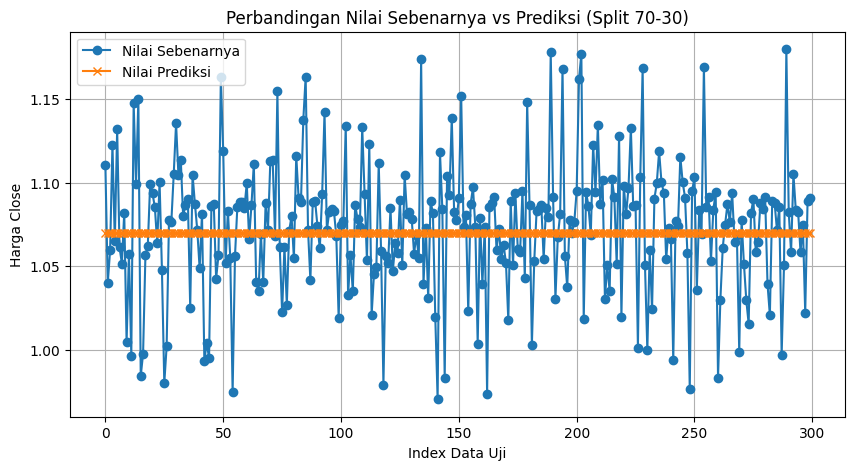

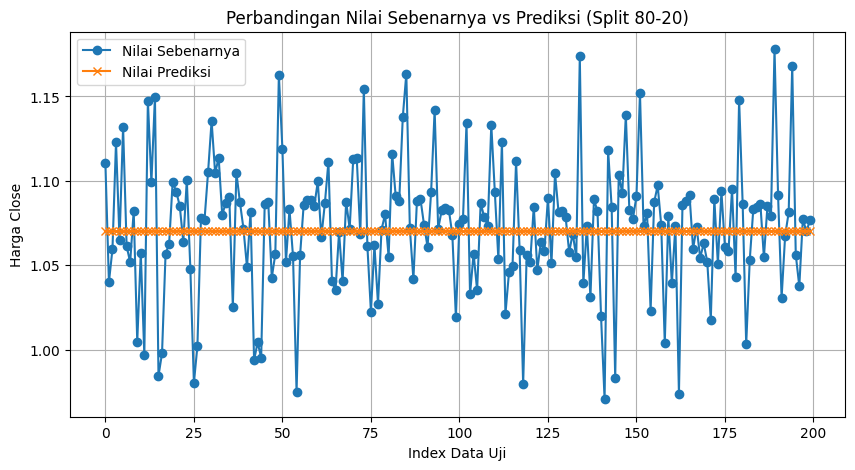

In [38]:
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    # Prediksi ulang biar dapat y_pred untuk masing-masing split
    y_pred, mae, rmse, mape, r2 = evaluate_model(svr_rbf, X_train, X_test, y_train, y_test)

    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label="Nilai Sebenarnya", marker='o')
    plt.plot(y_pred, label="Nilai Prediksi", marker='x')
    plt.title(f"Perbandingan Nilai Sebenarnya vs Prediksi (Split {split_name})")
    plt.xlabel("Index Data Uji")
    plt.ylabel("Harga Close")
    plt.legend()
    plt.grid(True)
    plt.show()

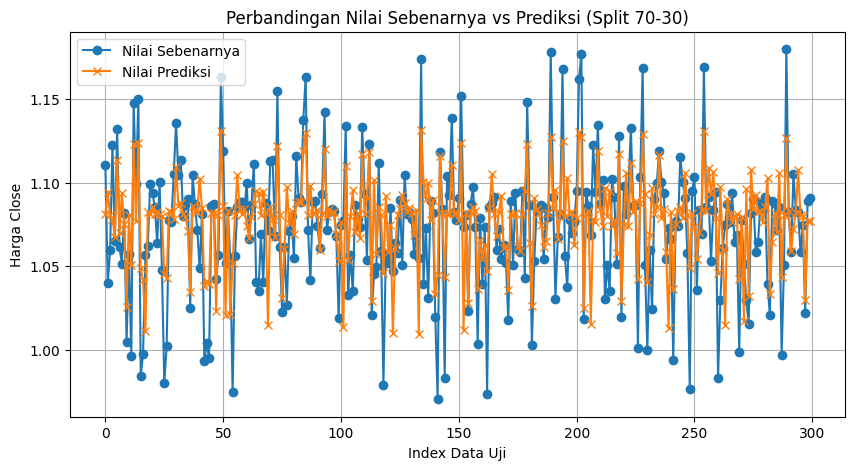

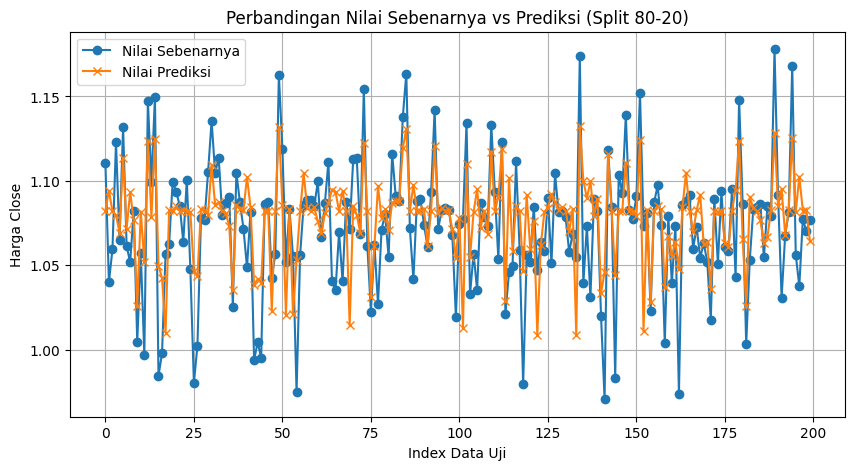

In [39]:
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    # Prediksi ulang biar dapat y_pred untuk masing-masing split
    y_pred, mae, rmse, mape, r2 = evaluate_model(svr_rbf2, X_train, X_test, y_train, y_test)

    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label="Nilai Sebenarnya", marker='o')
    plt.plot(y_pred, label="Nilai Prediksi", marker='x')
    plt.title(f"Perbandingan Nilai Sebenarnya vs Prediksi (Split {split_name})")
    plt.xlabel("Index Data Uji")
    plt.ylabel("Harga Close")
    plt.legend()
    plt.grid(True)
    plt.show()